<h1>Patient Survival Prediction</h1>
<hr>
<h2>Project 4</h2>
<p>This project predicts the survival of pacients in a UCI.</p>
<hr>
<h2>Modelling</h2>

In [30]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, make_scorer,
                            classification_report,
                            roc_auc_score, roc_curve, auc, precision_recall_curve,
                            confusion_matrix)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.wrappers.scikit_learn import KerasClassifier
#this wrapper iso ne oftThe original TensorFlow (TF) wrappers and are not actively maintained,
# and will be removed in a future release.
from scikeras.wrappers import KerasClassifier, KerasRegressor
from math import floor
from math import trunc
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

import tensorflow as tf

import joblib

%matplotlib inline


<hr>
Open dataset
<hr>

In [2]:
df_patients = pd.read_csv('../datasets/dataset_preprocessed.csv')

In [3]:
df_patients.head(10)

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_encoded,gender_encoded,icu_type_encoded,apache_3j_bodysystem_encoded,apache_2_bodysystem_encoded
0,0.0,68.0,22.730000,0.0,180.3,0.541667,73.9,113.0,502.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,9.0,0.0
1,0.0,77.0,27.420000,0.0,160.0,0.927778,70.2,108.0,203.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,8.0,6.0
2,0.0,25.0,31.950000,0.0,172.7,0.000694,95.3,122.0,703.03,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,5.0,3.0
3,0.0,81.0,22.640000,1.0,165.1,0.000694,61.7,203.0,1206.03,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
4,0.0,67.0,27.560000,0.0,190.5,0.000694,100.0,301.0,403.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0,7.0,4.0
5,0.0,59.0,57.450000,0.0,165.1,0.000694,156.6,108.0,203.01,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,8.0,6.0
6,0.0,50.0,25.710000,0.0,175.3,0.060417,79.0,112.0,107.01,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0
7,0.0,72.0,28.257052,1.0,154.9,0.004861,67.8,303.0,1304.08,1.0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,5.0,8.0,6.0
8,0.0,80.0,27.382812,1.0,160.0,1.271528,70.1,218.0,1505.02,1.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,5.0,7.0,4.0
9,0.0,81.0,38.189067,1.0,172.7,1.376389,113.9,303.0,1304.05,1.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,8.0,6.0


<hr>
Modelling
<hr>

In [4]:
#prepare the dataset, split into X and y datasets and then split them again into trains and test
X = df_patients.drop(['hospital_death'], axis=1)
y = df_patients['hospital_death']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=11, stratify = y)

In [6]:
#let's see how split the datasets are
print ('Split Datasets')
print ('==============')
print(f'1. X_train :{X_train.shape}')
print(f'2. y_train :{y_train.shape}')
print(f'1. X_test :{X_test.shape}')
print(f'2. y_test :{y_test.shape}')

Split Datasets
1. X_train :(61784, 103)
2. y_train :(61784,)
1. X_test :(26480, 103)
2. y_test :(26480,)


<P>Modelling the Neural Network</p>
<hr>
<p> 103 inputs, because is the size of the data set</p>
<p>due the result is binary, the output is set in 1</p>

In [7]:
# Neural network
#
nn_model = Sequential()
nn_model.add(Dense(260, input_dim=103, activation='relu'))
nn_model.add(Dense(520, activation='relu'))
nn_model.add(Dense(260, activation='relu'))
nn_model.add(Dense(130, activation='relu'))
nn_model.add(Dense(65, activation='relu'))
nn_model.add(Dense(1,activation='sigmoid'))

In [8]:
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

We can use test data as validation data and can check the accuracies after every epoch. This will give us an insight into overfitting at the time of training only and we can take steps before the completion of all epochs. That's why the using of <b>validation_data</b> tuple in the parameters of model.fit method

In [9]:
##Time to train!!
history = nn_model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=50, batch_size=64)

2023-06-10 17:49:16.501226: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 50910016 exceeds 10% of free system memory.


Epoch 1/50
964/966 [============================>.] - ETA: 0s - loss: 0.3401 - accuracy: 0.9115

2023-06-10 17:49:33.435340: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21819520 exceeds 10% of free system memory.


966/966 [==============================] - 19s 17ms/step - loss: 0.3400 - accuracy: 0.9115 - val_loss: 0.2360 - val_accuracy: 0.9174
Epoch 2/50
966/966 [==============================] - 15s 16ms/step - loss: 0.2344 - accuracy: 0.9182 - val_loss: 0.2254 - val_accuracy: 0.9183
Epoch 3/50
966/966 [==============================] - 14s 15ms/step - loss: 0.2268 - accuracy: 0.9200 - val_loss: 0.2206 - val_accuracy: 0.9198
Epoch 4/50
966/966 [==============================] - 16s 16ms/step - loss: 0.2200 - accuracy: 0.9204 - val_loss: 0.2119 - val_accuracy: 0.9228
Epoch 5/50
966/966 [==============================] - 18s 19ms/step - loss: 0.2189 - accuracy: 0.9216 - val_loss: 0.2097 - val_accuracy: 0.9231
Epoch 6/50
966/966 [==============================] - 14s 15ms/step - loss: 0.2160 - accuracy: 0.9218 - val_loss: 0.2191 - val_accuracy: 0.9117
Epoch 7/50
966/966 [==============================] - 14s 14ms/step - loss: 0.2142 - accuracy: 0.9227 - val_loss: 0.2166 - val_accuracy: 0.9225
Epo

history variable keeps values of every iteration, so let's visualize accuracy an losses

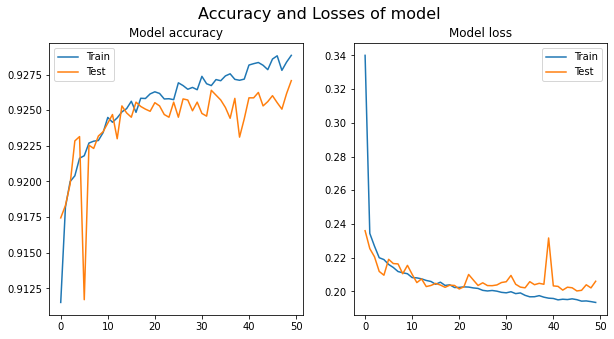

In [10]:
#plot
#ploting accuracy
figure, (axis1,axis2) = plt.subplots(1, 2,figsize=(10, 5))
figure.suptitle("Accuracy and Losses of model", fontsize=16)
axis1.plot(history.history['accuracy'])
axis1.plot(history.history['val_accuracy'])
axis1.title.set_text('Model accuracy')
axis1.title.set_y('Accuracy')
#axis1.title.set_x('Epoch')
axis1.legend(['Train', 'Test'], loc='upper left')

#ploting losses
axis2.plot(history.history['loss'])
axis2.plot(history.history['val_loss'])
axis2.title.set_text('Model loss')
axis2.title.set_y('Loss')
#axis2.title.set_x('Epoch')
axis2.legend(['Train', 'Test'], loc='upper right')

#show the graph

plt.show()

In [11]:
#predicting
y_pred = nn_model.predict(X_test)

2023-06-10 18:02:40.253874: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 21819520 exceeds 10% of free system memory.


828/828 [==============================] - 4s 4ms/step


<p>So far, the model looks fine, let's continue to score it. To assess how well a model fits a dataset, we can look at the following two metrics:</p>
<ul>
    <li>Sensitivity: The probability that the model predicts a positive outcome for an observation when indeed the outcome is positive. This is also called the “true positive rate.”</li>
    <li>Specificity: The probability that the model predicts a negative outcome for an observation when indeed the outcome is negative. This is also called the “true negative rate.”</li>
</ul>
<p>One way to visualize these two metrics is by creating a ROC curve, which stands for “receiver operating characteristic” curve.</p>

<p>This is a plot that displays the sensitivity along the y-axis and (1 – specificity) along the x-axis.</p>

<p>One way to quantify how well the logistic regression model does at classifying data is to calculate AUC, which stands for “area under curve.”</p>

<P>The closer the AUC is to 1, the better the model is.</p>

In [12]:
#Calculate de AUC
auc = roc_auc_score(y_test, y_pred)
print('Final Model Score')
print('=================')
print(f'AUC Score : {auc}')

Final Model Score
AUC Score : 0.8805275488798692


In [13]:
#calculate roc
falsePositiveRate, truePositiveRate, threathold = roc_curve(y_test, y_pred)

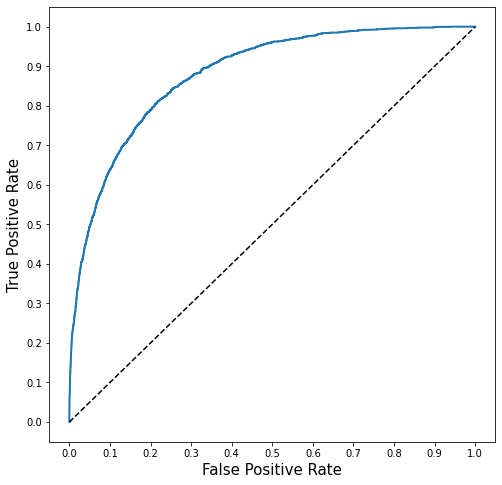

In [14]:
#let's plot the 
fig, ax = plt.subplots(figsize = (8, 8))
plt.plot(falsePositiveRate, truePositiveRate, linewidth = 2)
plt.plot([0, 1], [0, 1], 'k--')
ax.set_xlabel("False Positive Rate", fontsize = 15)
ax.set_ylabel("True Positive Rate", fontsize = 15)
ax.set_xticks(np.linspace(0, 1, 11));
ax.set_yticks(np.linspace(0, 1, 11));

<hr>
Tuning Parameters
<hr>
<p>A neural network has many hyperparameters to tune. Bayesian optimization is more efficient in time and memory capacity for tuning many hyperparameters.</p>
<p>Ref: https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/ </p>

In [19]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

#objective function containing the Neural Network model. 
#eturn returns the score of the cross-validation.

def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
                 'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
                 'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
                 'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(learning_rate= learning_rate)
        #look!! here is setting another neural network in order to optimize it
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=103, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(model=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [20]:
#run the bayesian optimization, after set the hyperparameters
# Set paramaters
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)


|   iter    |  target   | activa... | batch_... |  epochs   | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------------------
| 1         | 0.9145    | 5.51      | 335.3     | 54.88     | 0.7716    | 36.58     | 1.044     |
| 2         | 0.9145    | 0.2023    | 536.2     | 39.09     | 0.3443    | 99.16     | 1.664     |
| 3         | 0.9145    | 0.7307    | 735.7     | 69.7      | 0.2815    | 51.96     | 0.8286    |
| 4         | 0.9145    | 0.6656    | 920.6     | 83.52     | 0.8422    | 83.37     | 6.937     |
| 5         | 0.9177    | 5.195     | 851.0     | 53.71     | 0.03717   | 50.87     | 0.7373    |
| 6         | 0.9145    | 7.355     | 758.2     | 65.22     | 0.2815    | 99.86     | 0.9663    |
| 7         | 0.9145    | 5.539     | 588.0     | 52.4      | 0.7306    | 39.05     | 2.804     |
| 8         | 0.9145    | 2.871     | 957.8     | 93.5      | 0.8157    | 13.07     | 6.604     |
| 9         | 0.9145

In [21]:
#Here yhou are! the best hyperparameters
params_nn_ = nn_bo.max['params']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_

{'activation': 'selu',
 'batch_size': 851.0135336291902,
 'epochs': 53.7054301919375,
 'learning_rate': 0.037173480215022196,
 'neurons': 50.872297884262295,
 'optimizer': 0.7372825972056519}

Let's set the model again with the best parameters

In [23]:
nn_model_tuned = Sequential()
nn_model_tuned.add(Dense(params_nn_['neurons'], input_dim=103, activation=params_nn_['activation']))
nn_model_tuned.add(Dense(params_nn_['neurons']/2, activation = params_nn_['activation']))
nn_model_tuned.add(Dense(params_nn_['neurons']/4, activation = params_nn_['activation']))
nn_model_tuned.add(Dense(1, activation='sigmoid'))
nn_model_tuned.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
#train the tuned model
history = nn_model_tuned.fit(X_train, y_train,validation_data = (X_test,y_test),
                             epochs = trunc(params_nn_['epochs']),
                             batch_size = trunc(params_nn_['batch_size']))

Epoch 1/53
73/73 [==============================] - 4s 14ms/step - loss: 2.8304 - accuracy: 0.8487 - val_loss: 0.7001 - val_accuracy: 0.8753
Epoch 2/53
73/73 [==============================] - 1s 8ms/step - loss: 0.5205 - accuracy: 0.8821 - val_loss: 0.3992 - val_accuracy: 0.9045
Epoch 3/53
73/73 [==============================] - 1s 7ms/step - loss: 0.3441 - accuracy: 0.8993 - val_loss: 0.3040 - val_accuracy: 0.9061
Epoch 4/53
73/73 [==============================] - 1s 7ms/step - loss: 0.2869 - accuracy: 0.9076 - val_loss: 0.2709 - val_accuracy: 0.9073
Epoch 5/53
73/73 [==============================] - 1s 9ms/step - loss: 0.2602 - accuracy: 0.9122 - val_loss: 0.2506 - val_accuracy: 0.9148
Epoch 6/53
73/73 [==============================] - 1s 8ms/step - loss: 0.2485 - accuracy: 0.9147 - val_loss: 0.2416 - val_accuracy: 0.9146
Epoch 7/53
73/73 [==============================] - 1s 8ms/step - loss: 0.2416 - accuracy: 0.9154 - val_loss: 0.2338 - val_accuracy: 0.9169
Epoch 8/53
73/73 [=

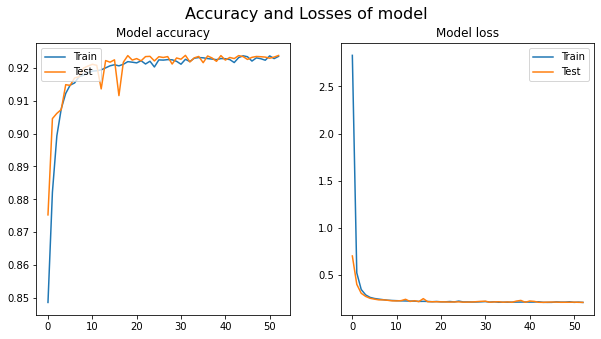

In [28]:
#plot the final model
#ploting accuracy
figure, (axis1,axis2) = plt.subplots(1, 2,figsize=(10, 5))
figure.suptitle("Accuracy and Losses of model", fontsize=16)
axis1.plot(history.history['accuracy'])
axis1.plot(history.history['val_accuracy'])
axis1.title.set_text('Model accuracy')
axis1.title.set_y('Accuracy')
#axis1.title.set_x('Epoch')
axis1.legend(['Train', 'Test'], loc='upper left')

#ploting losses
axis2.plot(history.history['loss'])
axis2.plot(history.history['val_loss'])
axis2.title.set_text('Model loss')
axis2.title.set_y('Loss')
#axis2.title.set_x('Epoch')
axis2.legend(['Train', 'Test'], loc='upper right')

#show the graph

plt.show()

<P>Great! we have a winner!</p>
<hr>
Save the model
<hr>


In [32]:
joblib.dump(nn_model_tuned, '../models/ps_model.joblib', compress=5)
X_test.to_csv('../datasets/dataset_test_final.csv',index=False)

INFO:tensorflow:Assets written to: ram://3a6c9d5d0c2c4543aa8f2732ae1db410/assets


INFO:tensorflow:Assets written to: ram://3a6c9d5d0c2c4543aa8f2732ae1db410/assets
